<a href="https://colab.research.google.com/github/ChinmayP3/Car-Price-Prediction-/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection and Preprocessing

In [48]:
# loading data into pandas dataframe
car_dataset=pd.read_csv('/content/car data.csv')

In [49]:
# inspecting the first 5 rows of the data


In [50]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [51]:
# checking the no of rows and column in data
car_dataset.shape

(301, 9)

In [52]:
# getting all info of the data using describe function 
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [53]:
# checking if there is any empty value in any column
car_dataset.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [54]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the categorical data

In [55]:
# encoding "Fuel_Type" 
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
 
# encoding "Seller_Type" 
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
 
# encoding "Transmission" 
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
 



Splitting the Data into Train and Test data

In [56]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']


Splitting Training and Test  Data 

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training


  1.Linear Regression

In [58]:
# loading linear regression model 
lin_reg_model = LinearRegression()

In [59]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [60]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [61]:
# R squared error 
# In classification we use Accuracy score , whereas in reggression we use R squared
error_score =metrics.r2_score(Y_train,training_data_prediction)
print("R squared error is : ",error_score) 

R squared error is :  0.8799451660493711


Visualize  the actual price and predicted prices

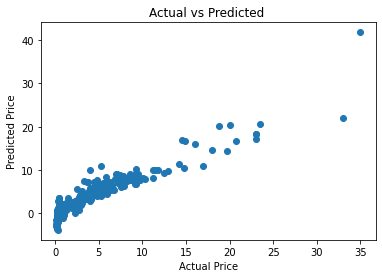

In [62]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted ")
plt.show()

In [63]:
# prediction on testing data
testing_data_prediction = lin_reg_model.predict(X_test)

In [64]:
# R squared error 
# In classification we use Accuracy score , whereas in reggression we use R squared
error_score =metrics.r2_score(Y_test,testing_data_prediction)
print("R squared error is : ",error_score) 

R squared error is :  0.8365766715027051


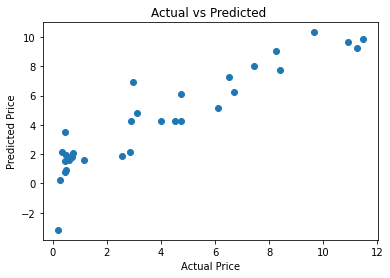

In [65]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted ")
plt.show()

LASSO REGRESSION

In [66]:
# loading linear regression model 
lasso_reg_model = Lasso()

In [67]:
lasso_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [68]:
# prediction on training data
training_data_prediction = lasso_reg_model.predict(X_train)

In [69]:
# R squared error 
# In classification we use Accuracy score , whereas in reggression we use R squared
error_score =metrics.r2_score(Y_train,training_data_prediction)
print("R squared error is : ",error_score) 

R squared error is :  0.8427856123435794


Visualize  the actual price and predicted prices

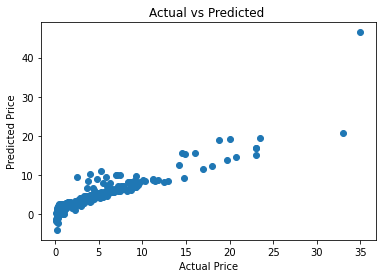

In [70]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted ")
plt.show()

In [71]:
# prediction on testing data
testing_data_prediction = lasso_reg_model.predict(X_test)

In [72]:
# R squared error 
# In classification we use Accuracy score , whereas in reggression we use R squared
error_score =metrics.r2_score(Y_test,testing_data_prediction)
print("R squared error is : ",error_score) 

R squared error is :  0.8709167941173195


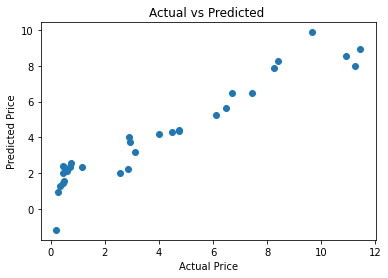

In [73]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted ")
plt.show()